In [1]:
from style import *


## Plot uncertainty metrics ModelNet40


In [2]:
with open('../../results/modelnet40/frequentist/plain.json') as f:
    plain = json.load(f)

with open('../../results/modelnet40/frequentist/augment.json') as f:
    augment = json.load(f)

with open('../../results/modelnet40/frequentist/invariant.json') as f:
    invariant = json.load(f)

with open('../../results/modelnet40/frequentist/equivariant.json') as f:
    equivariant = json.load(f)


with open('../../results/modelnet40/mll/plain.json') as f:
    plain_ll = json.load(f)

with open('../../results/modelnet40/mll/augment.json') as f:
    augment_ll = json.load(f)

with open('../../results/modelnet40/mll/invariant.json') as f:
    invariant_ll = json.load(f)

with open('../../results/modelnet40/mll/equivariant.json') as f:
    equivariant_ll = json.load(f)


/tmp/ipykernel_255005/1249525188.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(metric, width, c=color_map[color_idx], s=scatter_size, label=label)


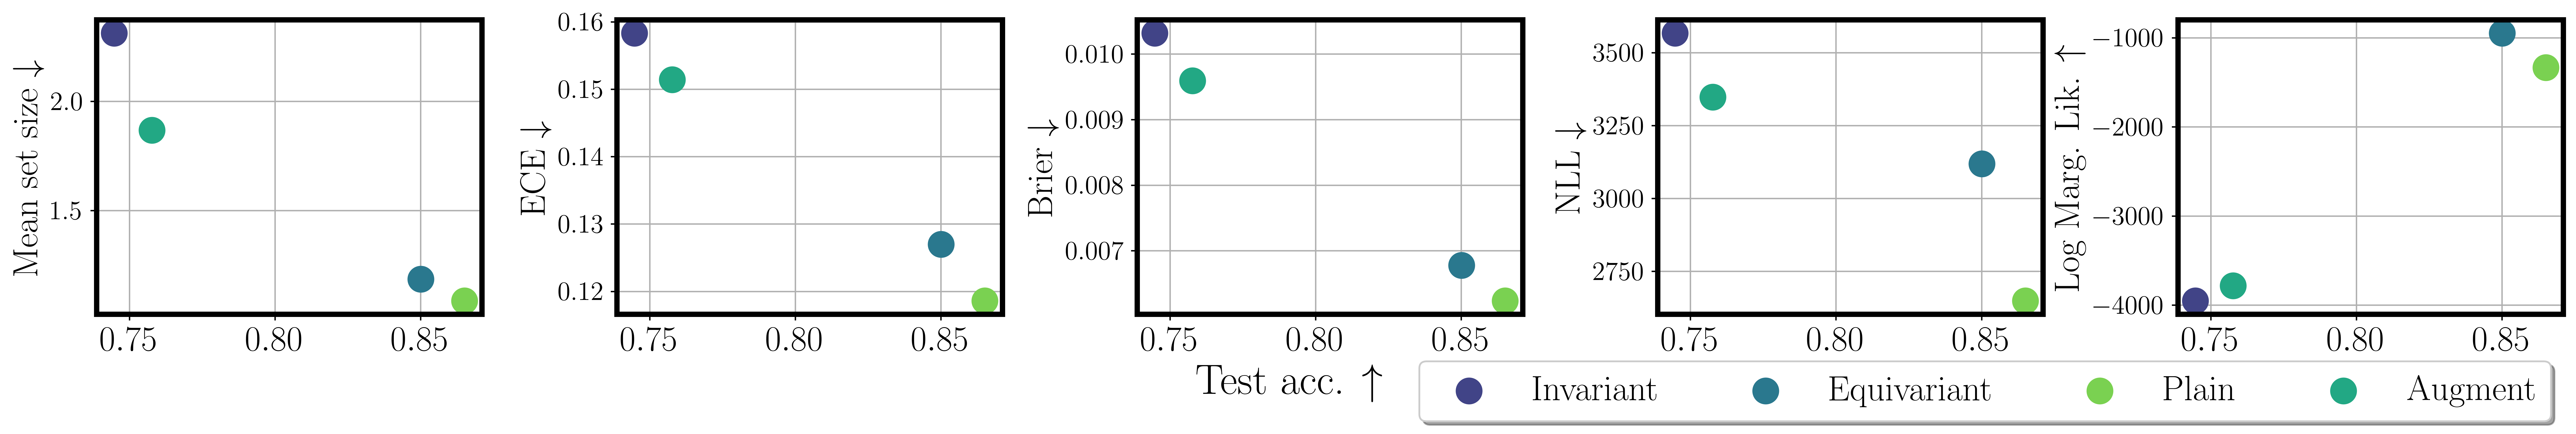

In [3]:
def plot_single_curve(data, ax, metric_key, color_idx, scatter_size, label):
    
    if metric_key == "predictive_ll":
        width = [ - data[metric_key]]
        metric = [data["test_acc"]], 
    elif "marglik" in metric_key:
        metric, width = [data["acc"]["test"]], [data[metric_key]]
    else:        
        metric, width = [data["test_acc"]], [data[metric_key]]
    
    ax.scatter(metric, width, c=color_map[color_idx], s=scatter_size, label=label)


def plot_metric(freq_models, ll_models, colors, scatter_size=200, fontsize=20):
    metrics = ["width_mean", "ECE", "brier", "predictive_ll"]

    fig, ax = plt.subplots(1, len(metrics)+1, figsize=(5*(len(metrics)+1),3), dpi=600)
    fig.subplots_adjust(wspace=0.35)

    for i, metric_key in enumerate(metrics):
        
        for model_name, model_data in freq_models.items():
            plot_single_curve(model_data, ax[i], metric_key, colors[model_name], scatter_size, model_name)

        ax[i].grid()
        ax[i].tick_params(axis='y', labelsize=15) 
        if i == 0: # Single y-label for all subplots
            ax[i].set_ylabel(r"Log Marginal Likelihood $(\uparrow)$", fontsize=fontsize)

        ax[i].set_axisbelow(True)        
        ax[i].set_ylabel(f"{metric2title[metric_key]} "+ r"$\downarrow$", fontsize=fontsize)
       

    
    # LL
    metric_key = "post_log_marglik"
    for model_name, model_data in ll_models.items():
        plot_single_curve(model_data, ax[4], metric_key, colors[model_name], scatter_size, model_name)
        
    ax[4].grid()
    ax[4].tick_params(axis='y', labelsize=15) 

    ax[4].set_axisbelow(True)        
    ax[4].set_ylabel(f"{metric2title[metric_key]} "+ r"$\uparrow$", fontsize=fontsize)

    
    fig.supxlabel(r"Test acc. $\uparrow$", y=-0.12)    
    
    plt.legend(
        loc='upper center', 
        bbox_to_anchor=(-0.5, -0.1),
        fancybox=True, 
        shadow=True, 
        ncol=4
    )

plot_metric(
    freq_models={
        "Invariant": invariant,
        "Equivariant": equivariant,
        "Plain": plain,
        "Augment": augment
    },
    ll_models={
        "Invariant": invariant_ll,
        "Equivariant": equivariant_ll,
        "Plain": plain_ll,
        "Augment": augment_ll
    },
    colors={
        "Invariant": 0,
        "Equivariant": 1,
        "Augment": 2,
        "Plain": 3,
    }
)
